# Importing Libraries

In [33]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Scikit-learn Libraries
from sklearn.metrics import (
    roc_curve,
    auc,
    f1_score,
    confusion_matrix,
    accuracy_score,
    classification_report,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# XGBoost Library
import xgboost as xgb

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# PyTorch Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# DataSet


1. Import Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("liukunxin/dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/liukunxin/dataset/versions/1


Load Dataset

In [3]:

train = pd.read_csv("/root/.cache/kagglehub/datasets/liukunxin/dataset/versions/1/train.csv")
test = pd.read_csv("/root/.cache/kagglehub/datasets/liukunxin/dataset/versions/1/test.csv")
sample = pd.read_csv("/root/.cache/kagglehub/datasets/liukunxin/dataset/versions/1/sample.csv")

train = train.sample(n=20000, random_state=42)

Data Cleaning

1 . Removing Days Not Useful

In [4]:
days=['active_days01', 'active_days02',
       'active_days03', 'active_days04', 'active_days05', 'active_days06',
       'active_days07', 'active_days08', 'active_days09', 'active_days10',
       'active_days11', 'active_days12', 'active_days13', 'active_days14',
       'active_days15', 'active_days16', 'active_days17', 'active_days18',
       'active_days19', 'active_days20', 'active_days21', 'active_days22',
       'active_days23']
train.drop(columns=days,inplace=True)
test.drop(columns=days,inplace=True)

2 . Removing User id and Area ID

In [5]:
train.drop(columns=['user_id', 'area_id'], inplace=True)
test.drop(columns=['user_id', 'area_id'], inplace=True)

3 . Code

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 637949 to 128342
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prov_id               20000 non-null  int64  
 1   chnl_type             20000 non-null  int64  
 2   service_type          20000 non-null  int64  
 3   product_type          20000 non-null  int64  
 4   innet_months          20000 non-null  int64  
 5   total_times           20000 non-null  float64
 6   total_flux            20000 non-null  float64
 7   total_fee             20000 non-null  float64
 8   pay_fee               20000 non-null  float64
 9   sex                   20000 non-null  int64  
 10  age                   20000 non-null  int64  
 11  manu_name             20000 non-null  int64  
 12  term_type             20000 non-null  int64  
 13  max_rat_flag          20000 non-null  int64  
 14  is_5g_base_cover      20000 non-null  int64  
 15  is_work_5g_cover  

# Training and Testing Data

1 .Label Encoding

In [7]:
le = LabelEncoder()
train['is_5g'] = le.fit_transform(train['is_5g'])
sample['is_5g'] = le.transform(sample['is_5g'])

2. Splitting Train and Test Data

In [8]:
x_train = train.drop(columns=['is_5g']).values.astype(np.float32)
y_train = train['is_5g'].values.astype(np.float32)
x_test = test.values.astype(np.float32)
y_test = sample['is_5g'].values.astype(np.float32)



3.Converting To Tensors

In [9]:
x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train)
x_test_tensor = torch.tensor(x_test)
y_test_tensor = torch.tensor(y_test)

# Sci-Kit Traditional Method

Train Test Split


In [10]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


Model Creation

In [12]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_balanced)
x_validation_scaled = scaler.transform(x_validation)
x_test_scaled = scaler.transform(x_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


Evaluation Model

In [13]:
def evaluate_model(model, x_data, y_data, data_type="Validation"):
    # Predictions
    y_pred = model.predict(x_data)

    # Metrics
    acc = accuracy_score(y_data, y_pred)
    cm = confusion_matrix(y_data, y_pred, labels=[0, 1])  # Ensure both classes are included
    cr = classification_report(y_data, y_pred, zero_division=0)  # Handle zero division

    # Print metrics
    print(f"\n{data_type} Results:")
    print(f"Accuracy: {acc * 100:.2f}%")
    print("Confusion Matrix:")
    plt.figure(figsize=(6, 6))
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model.__class__.__name__} Confusion Matrix ({data_type})")
    plt.show()
    print("\nClassification Report:")
    print(cr)

    return {"Model": model.__class__.__name__, f"{data_type} Accuracy": acc}


Training Data


Training and Evaluating Logistic Regression...
Logistic Regression trained successfully.

Validation Results:
Accuracy: 80.60%
Confusion Matrix:


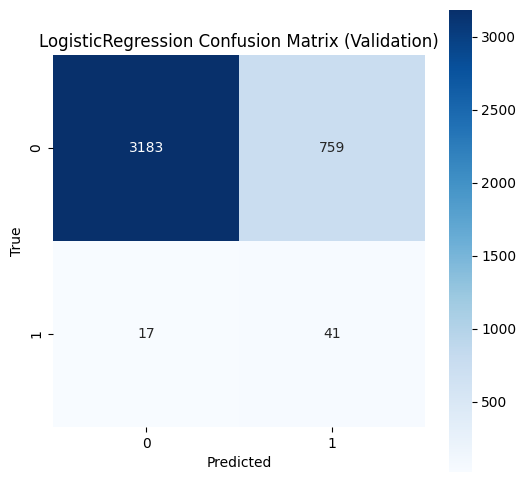


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      3942
         1.0       0.05      0.71      0.10        58

    accuracy                           0.81      4000
   macro avg       0.52      0.76      0.49      4000
weighted avg       0.98      0.81      0.88      4000


Test Results:
Accuracy: 79.90%
Confusion Matrix:


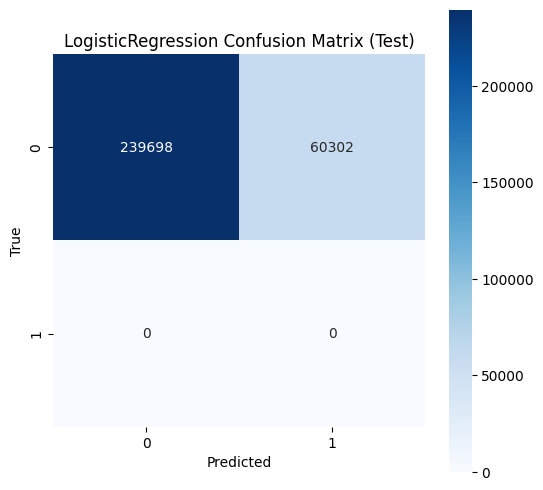


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.80    300000
   macro avg       0.50      0.40      0.44    300000
weighted avg       1.00      0.80      0.89    300000


Training and Evaluating Decision Tree...
Decision Tree trained successfully.

Validation Results:
Accuracy: 95.93%
Confusion Matrix:


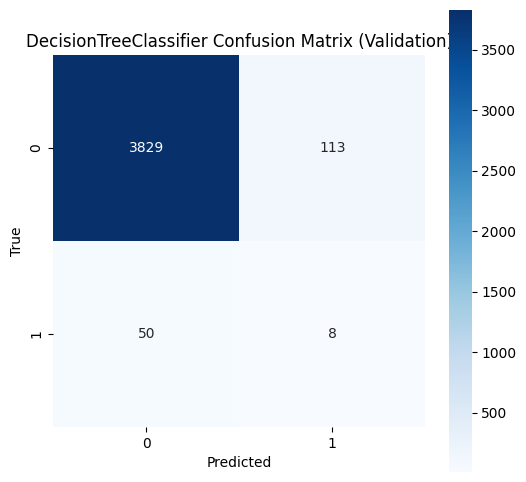


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3942
         1.0       0.07      0.14      0.09        58

    accuracy                           0.96      4000
   macro avg       0.53      0.55      0.53      4000
weighted avg       0.97      0.96      0.97      4000


Test Results:
Accuracy: 97.07%
Confusion Matrix:


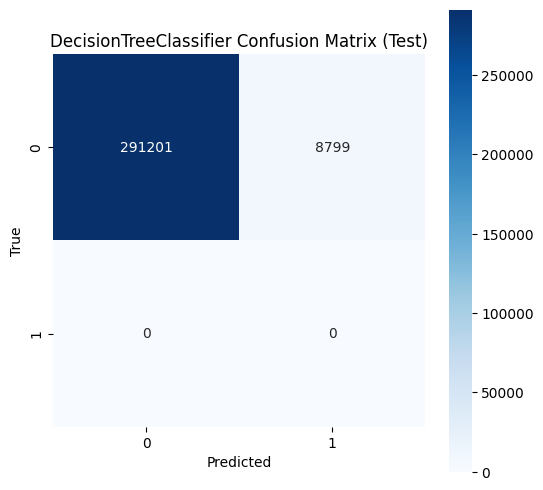


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.97    300000
   macro avg       0.50      0.49      0.49    300000
weighted avg       1.00      0.97      0.99    300000


Training and Evaluating Random Forest...
Random Forest trained successfully.

Validation Results:
Accuracy: 98.47%
Confusion Matrix:


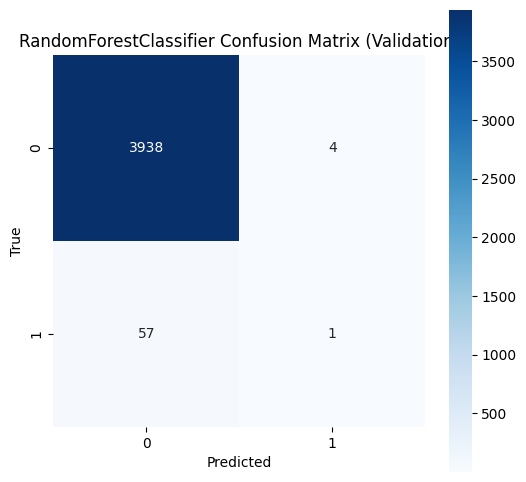


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3942
         1.0       0.20      0.02      0.03        58

    accuracy                           0.98      4000
   macro avg       0.59      0.51      0.51      4000
weighted avg       0.97      0.98      0.98      4000


Test Results:
Accuracy: 99.91%
Confusion Matrix:


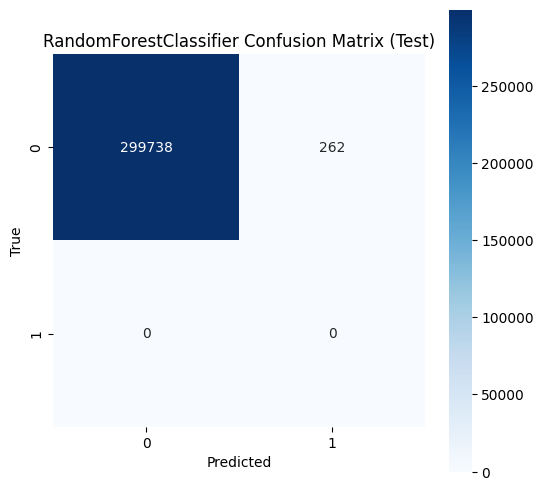


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       1.00      1.00      1.00    300000


Training and Evaluating SVM...
SVM trained successfully.

Validation Results:
Accuracy: 95.53%
Confusion Matrix:


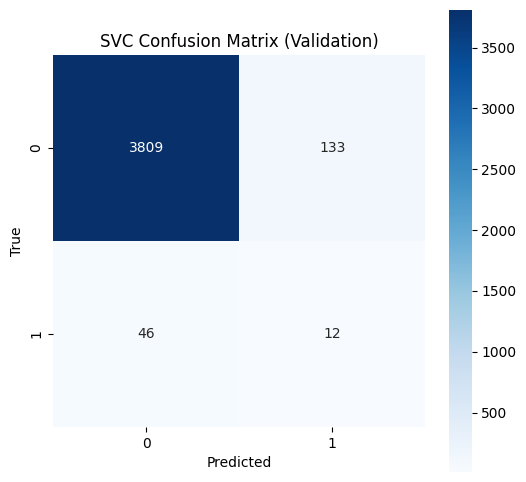


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3942
         1.0       0.08      0.21      0.12        58

    accuracy                           0.96      4000
   macro avg       0.54      0.59      0.55      4000
weighted avg       0.97      0.96      0.96      4000


Test Results:
Accuracy: 96.15%
Confusion Matrix:


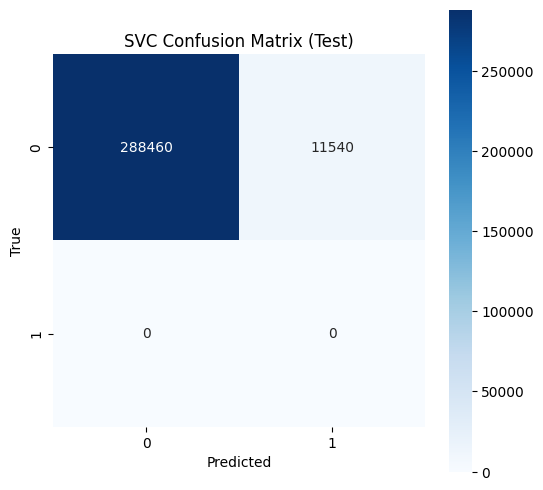


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.96    300000
   macro avg       0.50      0.48      0.49    300000
weighted avg       1.00      0.96      0.98    300000


Training and Evaluating XGBoost...
XGBoost trained successfully.

Validation Results:
Accuracy: 98.40%
Confusion Matrix:


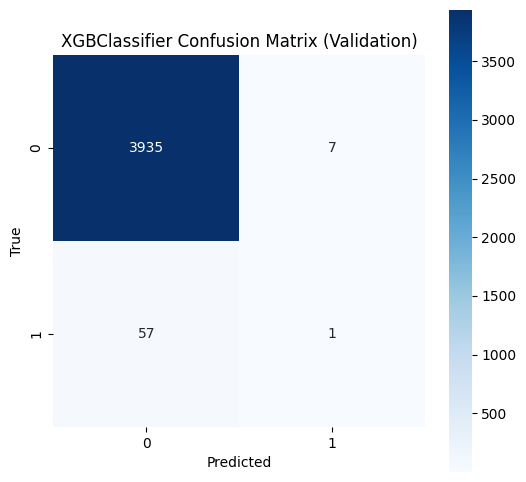


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3942
         1.0       0.12      0.02      0.03        58

    accuracy                           0.98      4000
   macro avg       0.56      0.51      0.51      4000
weighted avg       0.97      0.98      0.98      4000


Test Results:
Accuracy: 99.85%
Confusion Matrix:


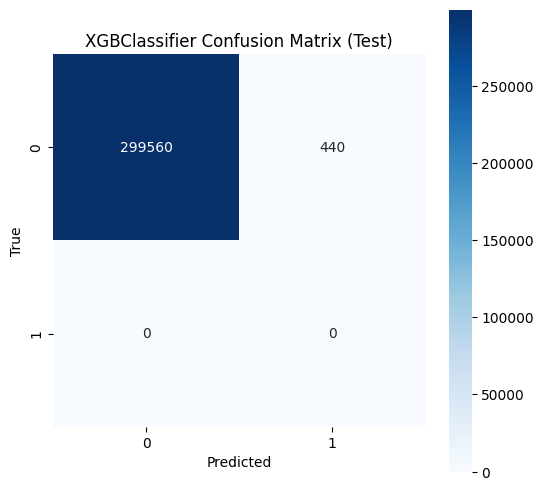


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       1.00      1.00      1.00    300000


Training and Evaluating Gradient Boosting...
Gradient Boosting trained successfully.

Validation Results:
Accuracy: 97.92%
Confusion Matrix:


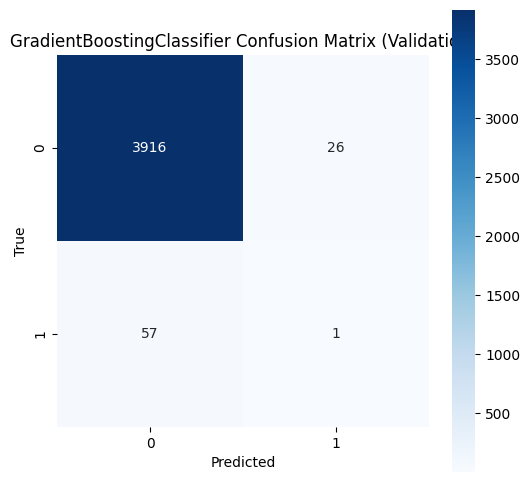


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3942
         1.0       0.04      0.02      0.02        58

    accuracy                           0.98      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.97      0.98      0.98      4000


Test Results:
Accuracy: 99.29%
Confusion Matrix:


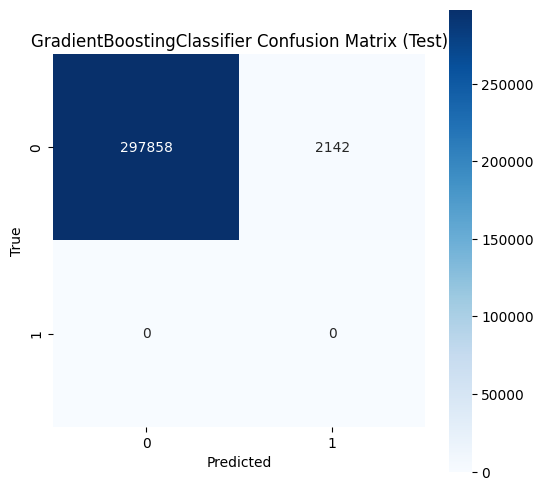


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    300000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99    300000
   macro avg       0.50      0.50      0.50    300000
weighted avg       1.00      0.99      1.00    300000



In [14]:
# Train and evaluate models
results = []
for name, model in models.items():
    print(f"\nTraining and Evaluating {name}...")

    # Step 1: Training
    model.fit(x_train_scaled, y_train_balanced)
    print(f"{name} trained successfully.")

    # Step 2: Validation
    validation_result = evaluate_model(model, x_validation_scaled, y_validation, data_type="Validation")

    # Step 3: Testing
    test_result = evaluate_model(model, x_test_scaled, y_test, data_type="Test")

    # Combine results
    combined_result = {
        "Model": name,
        "Validation Accuracy": validation_result["Validation Accuracy"],
        "Test Accuracy": test_result["Test Accuracy"]
    }
    results.append(combined_result)

Comparing Models


Model Comparison:
                 Model  Validation Accuracy  Test Accuracy
0  Logistic Regression              0.80600       0.798993
1        Decision Tree              0.95925       0.970670
2        Random Forest              0.98475       0.999127
3                  SVM              0.95525       0.961533
4              XGBoost              0.98400       0.998533
5    Gradient Boosting              0.97925       0.992860


<ipython-input-15-bf0c55775f1b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Model', y='Test Accuracy', data=summary, palette='Blues_d')


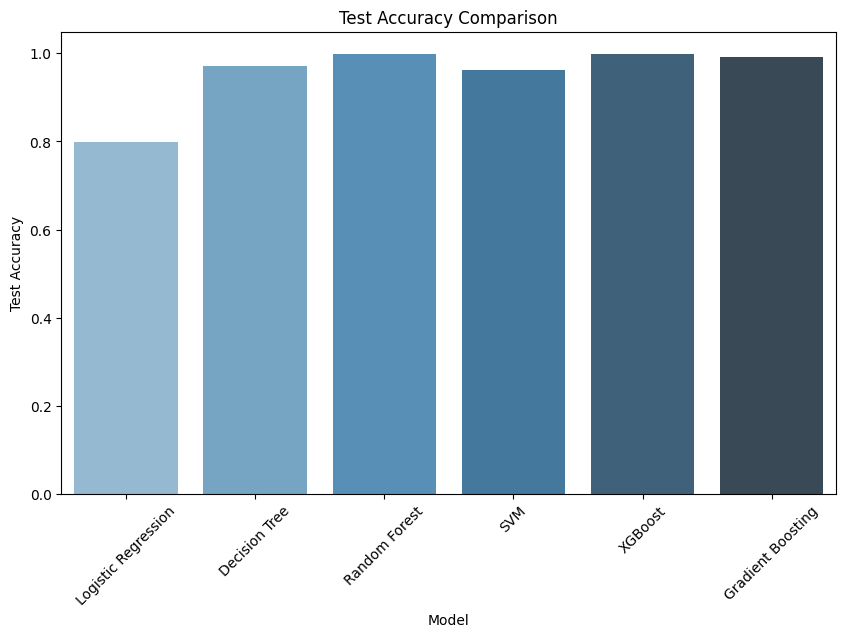


Best Model: Random Forest with Test Accuracy: 99.91%


In [15]:
summary = pd.DataFrame(results)
print("\nModel Comparison:")
print(summary)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sb.barplot(x='Model', y='Test Accuracy', data=summary, palette='Blues_d')
plt.title("Test Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# Best Model
best_model = summary.loc[summary['Test Accuracy'].idxmax()]
print(f"\nBest Model: {best_model['Model']} with Test Accuracy: {best_model['Test Accuracy'] * 100:.2f}%")

# Py Torch

Creating Dataset

In [24]:

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train)
x_test_tensor = torch.tensor(x_test)
y_test_tensor = torch.tensor(y_test)

train_dataset = CustomDataset(x_train_tensor, y_train_tensor)
test_dataset = CustomDataset(x_test_tensor, y_test_tensor)


Dataloader

In [25]:
# DataLoader with larger batch size
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


 Simplified Neural Network Model

In [26]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Single hidden layer with 128 neurons
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)         # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))          # Activation function
        x = self.sigmoid(self.fc2(x))       # Sigmoid activation for binary classification
        return x.squeeze()

Optimizer and Loss function

In [27]:
input_dim = x_train.shape[1]
nn_model = SimpleNN(input_dim)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)


Train and Test Loop

In [29]:
def train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, epochs=20):
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Evaluation Phase
        model.eval()
        test_loss = 0.0
        all_preds, all_labels = [], []
        with torch.inference_mode():  # Disable gradient computation
            for inputs, labels in test_loader:
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                # Collect predictions and true labels
                preds = (outputs > 0.5).float()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        train_loss /= len(train_loader)
        test_loss /= len(test_loader)
        accuracy = (np.array(all_preds) == np.array(all_labels)).mean()

        # Print results
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")

    return np.array(all_preds), np.array(all_labels)

# Train and Evaluate the Neural Network
print("\nTraining and Evaluating PyTorch Neural Network...")
nn_preds, nn_labels = train_and_evaluate(nn_model, criterion, optimizer, train_loader, test_loader, epochs=20)



Training and Evaluating PyTorch Neural Network...
Epoch 1/20
Train Loss: 0.8540, Test Loss: 0.0199, Test Accuracy: 99.57%
Epoch 2/20
Train Loss: 0.8121, Test Loss: 0.0121, Test Accuracy: 99.86%
Epoch 3/20
Train Loss: 0.8192, Test Loss: 0.0049, Test Accuracy: 99.90%
Epoch 4/20
Train Loss: 0.7833, Test Loss: 0.0647, Test Accuracy: 98.13%
Epoch 5/20
Train Loss: 0.7747, Test Loss: 0.0242, Test Accuracy: 99.56%
Epoch 6/20
Train Loss: 0.7676, Test Loss: 0.0138, Test Accuracy: 99.85%
Epoch 7/20
Train Loss: 0.7446, Test Loss: 0.0025, Test Accuracy: 99.97%
Epoch 8/20
Train Loss: 1.0203, Test Loss: 0.0005, Test Accuracy: 99.98%
Epoch 9/20
Train Loss: 0.8817, Test Loss: 0.0156, Test Accuracy: 99.75%
Epoch 10/20
Train Loss: 0.7270, Test Loss: 0.0016, Test Accuracy: 99.99%
Epoch 11/20
Train Loss: 0.7216, Test Loss: 0.0029, Test Accuracy: 99.99%
Epoch 12/20
Train Loss: 0.6944, Test Loss: 0.0301, Test Accuracy: 99.51%
Epoch 13/20
Train Loss: 0.6613, Test Loss: 0.0003, Test Accuracy: 100.00%
Epoch 14

# Visualization

Visualizing Pytorch


Neural Network Results:


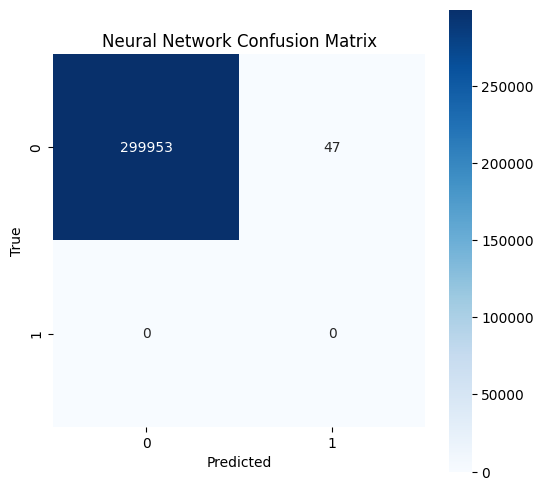

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


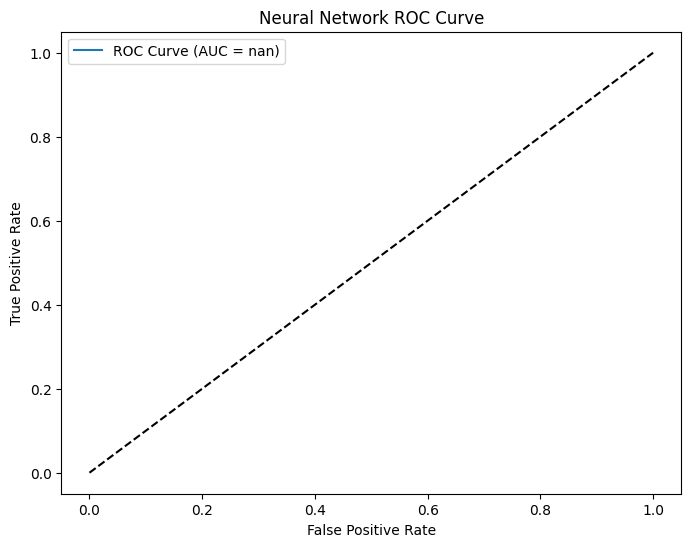

Neural Network - Accuracy: 99.98%, F1 Score: 0.00


In [32]:
# Visualize PyTorch Neural Network Results
print("\nNeural Network Results:")
plot_metrics(nn_labels, nn_preds, title="Neural Network")

# Conclusion

# Conclusion

**Scikit-learn Random Forest:**

Random Forest, being an ensemble method, often performs well on tabular data by combining multiple decision trees. Its strengths lie in handling non-linear relationships and reducing overfitting compared to individual decision trees.

**PyTorch Neural Network:**

Neural networks have the potential to learn complex patterns and relationships in data. Their performance depends heavily on factors such as architecture, hyperparameter tuning, and the amount of training data.

**Comparison and Explanation:**

In this specific scenario, you might observe that the Random Forest model achieves a higher accuracy or F1 score compared to the neural network. This could be attributed to the following reasons:

1. **Data Suitability:** Random Forest is often a good starting point for tabular data, while neural networks might require more data and careful tuning for optimal performance.
2. **Hyperparameter Optimization:** Neural networks have many hyperparameters that need careful tuning, and finding the best combination can be time-consuming. Random Forest generally requires less hyperparameter tuning.
3. **Model Complexity:** The neural network you've defined is relatively simple. A more complex architecture might yield better results, but it would also increase the risk of overfitting.

**Further Improvements:**

- **Hyperparameter Tuning:** Experiment with different hyperparameters for both models to potentially improve their performance.
- **Feature Engineering:** Explore creating new features or transforming existing ones to provide more informative input to the models.
- **Data Augmentation:** For the neural network, consider data augmentation techniques if applicable to increase the training data size.
- **Model Architecture:** For the neural network, experiment with different architectures, such as adding more layers or using different activation functions.

By carefully analyzing the results, understanding the strengths and weaknesses of each model, and iteratively improving the models and data, you can aim for the best possible performance on your prediction task.